In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv('dataset.csv', delimiter=';', encoding='cp1252', skiprows=[1]) 
df.head(10)

,NRO_REGISTRO,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,GOBIERNO_LOCAL,UBICACION,MARCA,MODELO,ALTURA,LATITUD,LONGITUD,CONDICIÓN,CONECTIVIDAD
0,1,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Medina y Tovar (BASE),DAHUA,PTZ,9,-12.074505,-77.163832,Operativa,Cable Utp
1,2,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Tovar y Larco (POZUZO),DAHUA,PTZ,9,-12.073643,-77.161620,Operativa,Radio enlace
2,3,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Tovar y Moore,VIVOTECK,PTZ,9,-12.071654,-77.159976,Operativa,Radio enlace
3,4,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Medina y Tarapaca,VIVOTECK,PTZ,9,-12.074107,-77.163738,Operativa,Radio enlace
4,5,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Saenz Peña y Grau (MUNI),DAHUA,PTZ,9,-12.072552,-77.163159,Operativa,Cable Utp
5,6,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Grau (COMISARIA),DAHUA,PTZ,9,-12.067892,-77.157740,Operativa,Radio enlace
6,7,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Bolognesi y Galvez,DAHUA,PTZ,9,-12.068012,-77.158424,Operativa,Radio enlace
7,8,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Malecon Figueredo y Ferre,PANASONIC,PTZ,9,-12.068502,-77.160479,Operativa,Radio enlace
8,9,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Bolognesi c/6 (MERCADO),DAHUA,PTZ,9,-12.069572,-77.161011,Operativa,Cable Utp
9,10,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Fanning y Arrieta,DAHUA,PTZ,9,-12.070246,-77.163344,Operativa,Radio enlace


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NRO_REGISTRO    24 non-null     int64  
 1   FECHA_CORTE     24 non-null     int64  
 2   DEPARTAMENTO    24 non-null     object 
 3   PROVINCIA       24 non-null     object 
 4   DISTRITO        24 non-null     object 
 5   UBIGEO          24 non-null     int64  
 6   GOBIERNO_LOCAL  24 non-null     object 
 7   UBICACION       24 non-null     object 
 8   MARCA           24 non-null     object 
 9   MODELO          24 non-null     object 
 10  ALTURA          24 non-null     int64  
 11  LATITUD         24 non-null     float64
 12  LONGITUD        24 non-null     float64
 13  CONDICIÓN       24 non-null     object 
 14  CONECTIVIDAD    24 non-null     object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.9+ KB


In [14]:
print("1. Dimensiones (Shape):", df.shape, "\n")
print("\n2. Valores Nulos por Columna:\n", df.isnull().sum())
print("\n3. Filas Duplicadas Totales:", df.duplicated().sum(), "\n")
print("4. Valores Únicos por Columna:\n", df.nunique())

1. Dimensiones (Shape): (24, 15) 


2. Valores Nulos por Columna:
 NRO_REGISTRO      0
FECHA_CORTE       0
DEPARTAMENTO      0
PROVINCIA         0
DISTRITO          0
UBIGEO            0
GOBIERNO_LOCAL    0
UBICACION         0
MARCA             0
MODELO            0
ALTURA            0
LATITUD           0
LONGITUD          0
CONDICIÓN         0
CONECTIVIDAD      0
dtype: int64

3. Filas Duplicadas Totales: 0 

4. Valores Únicos por Columna:
 NRO_REGISTRO      24
FECHA_CORTE        1
DEPARTAMENTO       1
PROVINCIA          1
DISTRITO           1
UBIGEO             1
GOBIERNO_LOCAL     1
UBICACION         24
MARCA              3
MODELO             1
ALTURA             2
LATITUD           24
LONGITUD          24
CONDICIÓN          1
CONECTIVIDAD       2
dtype: int64


In [18]:
df.head()

,NRO_REGISTRO,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,GOBIERNO_LOCAL,UBICACION,MARCA,MODELO,ALTURA,LATITUD,LONGITUD,CONDICIÓN,CONECTIVIDAD
0,1,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Medina y Tovar (BASE),DAHUA,PTZ,9,-12.074505,-77.163832,Operativa,Cable Utp
1,2,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Tovar y Larco (POZUZO),DAHUA,PTZ,9,-12.073643,-77.161620,Operativa,Radio enlace
2,3,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Tovar y Moore,VIVOTECK,PTZ,9,-12.071654,-77.159976,Operativa,Radio enlace
3,4,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Medina y Tarapaca,VIVOTECK,PTZ,9,-12.074107,-77.163738,Operativa,Radio enlace
4,5,20260130,CALLAO,PROV. CONST. DEL CALLAO,LA PUNTA,70105,MUNICIPALIDAD DISTRITAL DE LA PUNTA,Saenz Peña y Grau (MUNI),DAHUA,PTZ,9,-12.072552,-77.163159,Operativa,Cable Utp


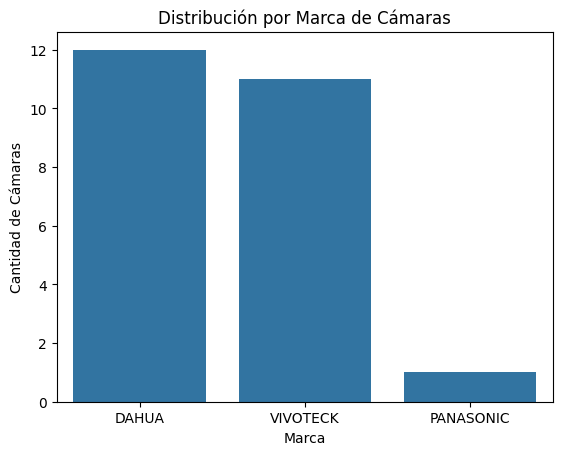

In [32]:
sns.countplot(x='MARCA', data=df)
plt.title('Distribución por Marca de Cámaras')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Cámaras')
plt.show()

Se evidencia que las marcas más compradas son Dahua y VivoTeck

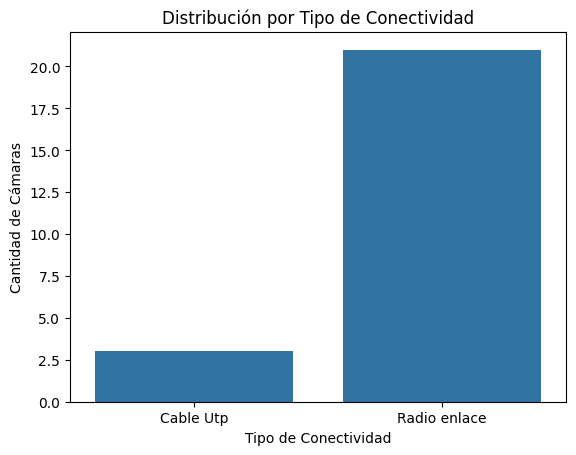

In [30]:
sns.countplot(x='CONECTIVIDAD', data=df)
plt.title('Distribución por Tipo de Conectividad')
plt.xlabel('Tipo de Conectividad')
plt.ylabel('Cantidad de Cámaras')
plt.show()

La mayoría de cámaras utilizan la tecnología de radio enlace para la conectividad

In [ ]:
sns.countplot(x='CONECTIVIDAD', data=df)

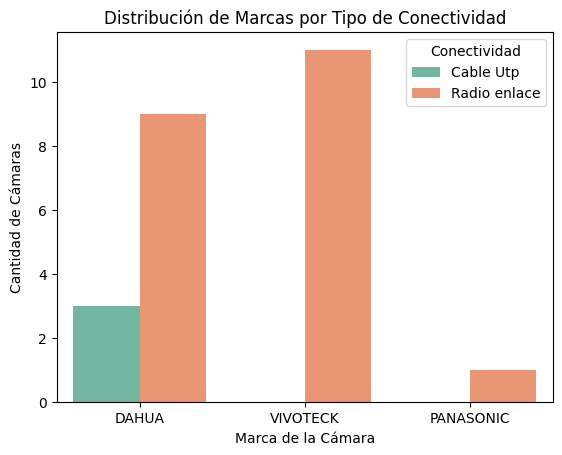

In [28]:
sns.countplot(x='MARCA', hue='CONECTIVIDAD', data=df, palette='Set2')
plt.title('Distribución de Marcas por Tipo de Conectividad')
plt.xlabel('Marca de la Cámara')
plt.ylabel('Cantidad de Cámaras')
plt.legend(title='Conectividad')
plt.show()

Podemos ver que las unicas cámaras que cuentan con conectividad por Cable UTP son las de la marca DAHUA!

Text(0, 0.5, 'Cantidad de Cámaras')

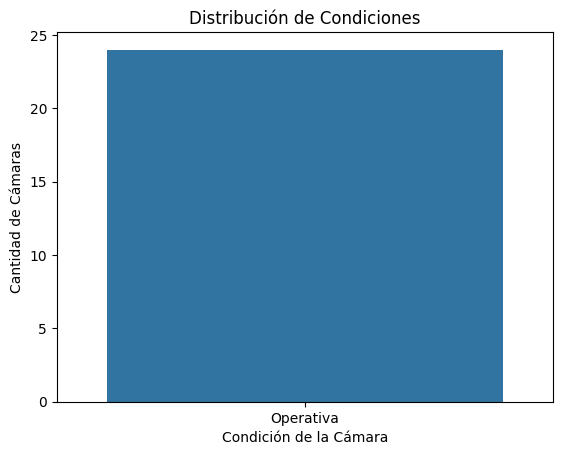

In [41]:
sns.countplot(x='CONDICIÓN', data=df)
plt.title('Distribución de Condiciones')
plt.xlabel('Condición de la Cámara')
plt.ylabel('Cantidad de Cámaras')


Todas las cámaras funcionan

In [ ]:
import folium
mapa = folium.Map(location=[df['LATITUD'].mean(), df['LONGITUD'].mean()], zoom_start=15)

for _, row in df.iterrows():
    color = 'blue' if row['CONECTIVIDAD'] == 'Radio enlace' else 'green'
    folium.Marker(
        location=[row['LATITUD'], row['LONGITUD']],
        popup=f"{row['MARCA']} - {row['CONDICIÓN']}",
        icon=folium.Icon(color=color)
    ).add_to(mapa)

mapa.save('mapa_camaras.html')

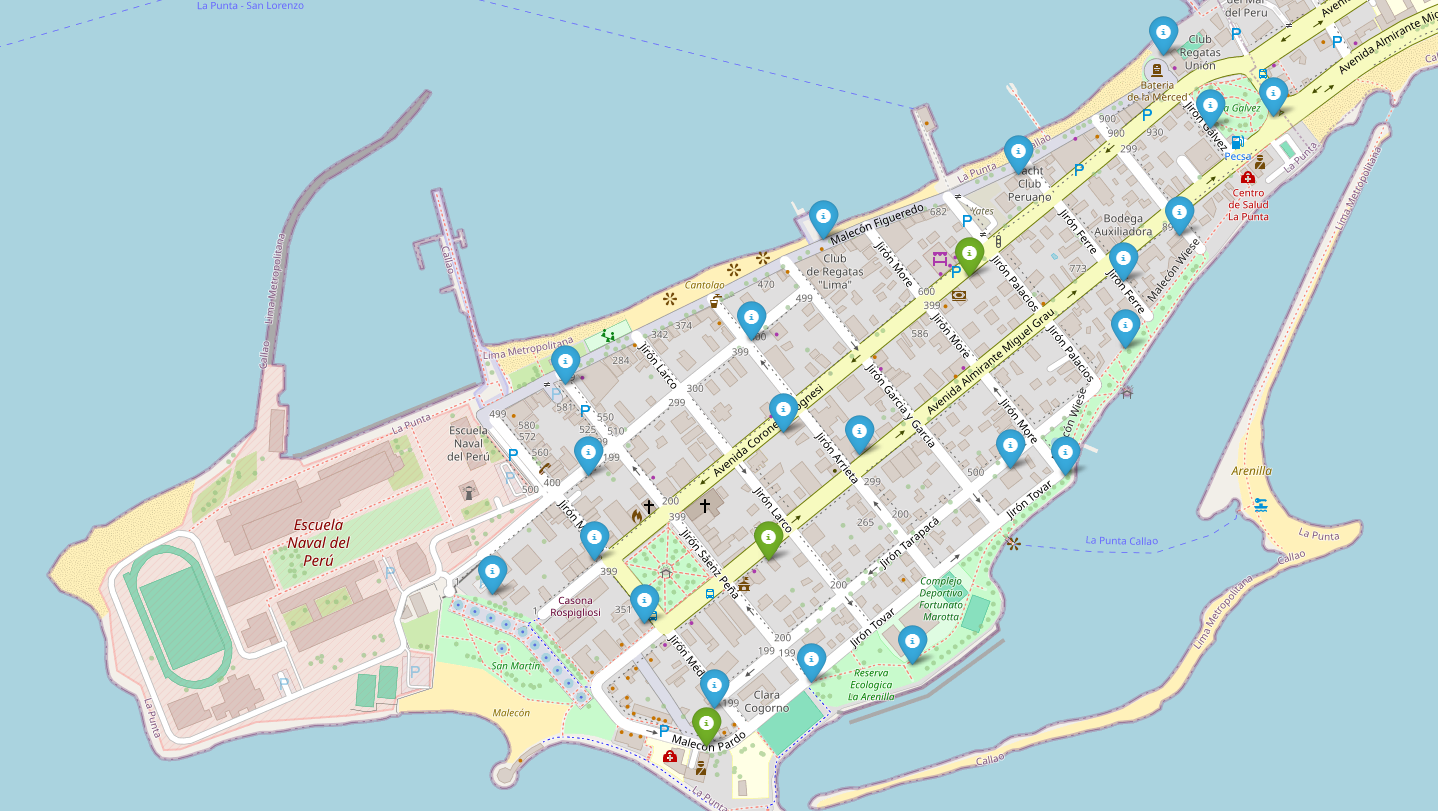

Se puede abrir en el mapa que las cámaras azules son las de tipo Radio Enlace mientras que las verdes son con Cable UTP. Se puede ver una correcta distribución de las cámaras a lo largo de La Punta menos en el medio de la Avenida Almirante Miguel Grau, donde faltaría la instalación de una cámara para tener correcta visibilidad y seguridad de esa zona en específico.